##**SOCIAL MEDIA TREND ANALYSIS PROJECT**

## Upload and Load the Dataset

In [2]:
from google.colab  import files

In [3]:
uploaded = files.upload()

Saving Social Media Sentiments Analysis Dataset.csv to Social Media Sentiments Analysis Dataset.csv


In [4]:
import pandas as pd


In [5]:
df = pd.read_csv('Social Media Sentiments Analysis Dataset.csv')

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


##Clean the Data

In [17]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

KeyError: "['Unnamed: 0', 'Unnamed: 0.1'] not found in axis"

In [10]:
df = df.apply(lambda x: x.str.strip()
if x.dtype == "object" else x)

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

In [16]:
df[['Likes', 'Retweets']] = df[['Likes', 'Retweets']].fillna(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    float64       
 7   Likes      732 non-null    float64       
 8   Country    732 non-null    object        
 9   Year       732 non-null    int64         
 10  Month      732 non-null    int64         
 11  Day        732 non-null    int64         
 12  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 74.5+ KB


##Sentiment Analysis

In [19]:
from textblob import TextBlob

In [21]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
    df['Polarity'] = df['Text'].apply(get_sentiment)

##Hashtag & Topic Extraction

In [22]:
import re
from collections import Counter

In [39]:
all_hashtags = df['Hashtags'].dropna().apply(lambda x: re.findall(r"#\w+", x.lower()))
hashtag_flat = [tag for sublist in all_hashtags for tag in sublist]

In [41]:
Counter(hashtag_flat).most_common(10)

[('#serenity', 15),
 ('#gratitude', 13),
 ('#excitement', 13),
 ('#despair', 11),
 ('#nostalgia', 11),
 ('#contentment', 10),
 ('#curiosity', 10),
 ('#awe', 9),
 ('#grief', 9),
 ('#loneliness', 9)]

##Basic Analysis

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment'>

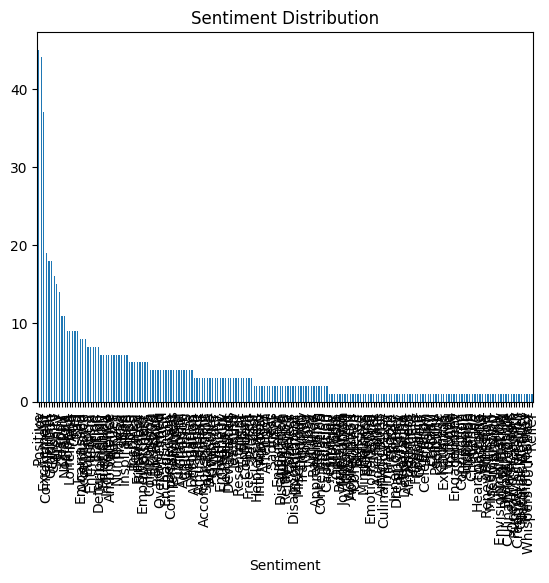

In [43]:
import matplotlib.pyplot as plt
df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')

In [44]:
df.groupby('Sentiment')[['Likes', 'Retweets']].mean()

,Likes,Retweets
Sentiment,,
Acceptance,34.125000,17.000000
Accomplishment,51.666667,26.000000
Admiration,43.750000,21.750000
Adoration,45.000000,22.000000
Adrenaline,45.000000,22.000000
...,...,...
Winter Magic,60.000000,30.000000
Wonder,73.333333,36.666667
Wonderment,70.000000,35.000000


<ipython-input-45-0c846aa28ea8>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Timestamp').resample('M').size().plot(title='Posts Over Time')


<Axes: title={'center': 'Posts Over Time'}, xlabel='Timestamp'>

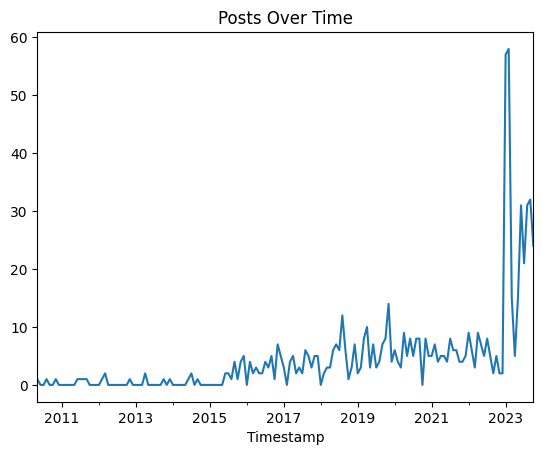

In [45]:
df.set_index('Timestamp').resample('M').size().plot(title='Posts Over Time')

##Export Cleaned Data to Excel for Power BI or Dashboard

In [28]:
df.to_csv('Cleaned_Social_Media_Data.csv', index=False)

In [29]:
from google.colab import files
files.download('Cleaned_Social_Media_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>